In [28]:
import pandas as pd
import folium
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import seaborn as sns

In [2]:
df=pd.read_excel("C:/Users/wnrrh/Desktop/data/개선/위험도3단계.xlsx",header=0)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   시설명            12 non-null     object 
 1   시간대구분          12 non-null     int64  
 2   주소             12 non-null     object 
 3   도로명            12 non-null     object 
 4   행정동            12 non-null     object 
 5   행정동 별 인구       12 non-null     int64  
 6   면적             12 non-null     float64
 7   인구밀도           12 non-null     int64  
 8   자치구            12 non-null     object 
 9   시설종류           12 non-null     int64  
 10  구역지정수          12 non-null     int64  
 11  보호구역도로폭        12 non-null     float64
 12  CCTV설치여부       12 non-null     int64  
 13  CCTV 수         12 non-null     int64  
 14  도로표지판 수        12 non-null     float64
 15  과속방지턱 수        12 non-null     int64  
 16  위도             12 non-null     float64
 17  경도             12 non-null     float64
 18  tmp         

In [23]:
# 시작위치는 12개의 평균 위치
map_osm = folium.Map(location=[37.53438212,126.965699],zoom_start=11)

In [25]:
for i in df.index:
    lat=df.loc[i,'위도']
    long=df.loc[i,'경도']
    folium.CircleMarker([lat,long],
                       radius=df.loc[i,'위험도'],
                       popup=df.loc[i,'시설명'],
                        weight = 5,
                       color='red',
                       fill=True).add_to(map_osm)
map_osm

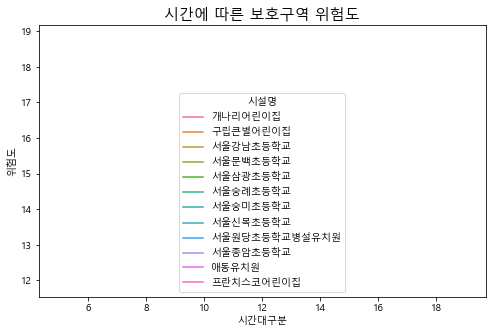

In [30]:
# 시간에 따른 보호구역 위험도
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='시간대구분', y='위험도', hue = '시설명', ci=None)
plt.title("시간에 따른 보호구역 위험도", fontdict={'fontsize':15})
plt.show()

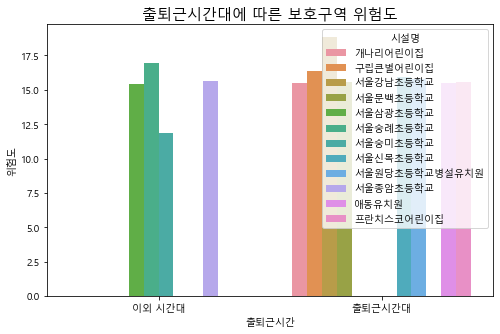

In [32]:
# 출퇴근 시간대 여부
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='시설명',y='위험도', hue='시설명')
plt.title("출퇴근시간대에 따른 보호구역 위험도", fontdict={'fontsize':15})
plt.xticks([0,1],['이외 시간대','출퇴근시간대'])
plt.show()

In [ ]:
# 등하교 시간대 여부
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='등하교시간',y='위험도', hue='시설명')
plt.title("등하교시간대에 따른 보호구역도", fontdict={'fontsize':15})
plt.xticks([0,1],['나머지 시간대','22시~0시'])
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   시설명            12 non-null     object 
 1   시간대구분          12 non-null     int64  
 2   주소             12 non-null     object 
 3   도로명            12 non-null     object 
 4   행정동            12 non-null     object 
 5   행정동 별 인구       12 non-null     int64  
 6   면적             12 non-null     float64
 7   인구밀도           12 non-null     int64  
 8   자치구            12 non-null     object 
 9   시설종류           12 non-null     int64  
 10  구역지정수          12 non-null     int64  
 11  보호구역도로폭        12 non-null     float64
 12  CCTV설치여부       12 non-null     int64  
 13  CCTV 수         12 non-null     int64  
 14  도로표지판 수        12 non-null     float64
 15  과속방지턱 수        12 non-null     int64  
 16  위도             12 non-null     float64
 17  경도             12 non-null     float64
 18  tmp         